<a href="https://colab.research.google.com/github/Kussil/CVX_Rice_project/blob/main/04_Stock_Modeling/Stock_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
!pip install -q ipympl

In [20]:
from google.colab import output
import textwrap
output.enable_custom_widget_manager()

In [21]:
!rm -rf /content/CVX_Rice_project/

In [1]:
# Import github token with google secrets thingy and clone git repository
import os
from google.colab import userdata
GITHUB_TOKEN = userdata.get('github')
os.environ['GITHUB_TOKEN'] = GITHUB_TOKEN
!git clone https://{GITHUB_TOKEN}@github.com/Kussil/CVX_Rice_project.git

Cloning into 'CVX_Rice_project'...
remote: Enumerating objects: 1523, done.
remote: Counting objects: 100% (512/512), done.
remote: Compressing objects: 100% (245/245), done.
remote: Total 1523 (delta 282), reused 483 (delta 258), pack-reused 1011
Receiving objects: 100% (1523/1523), 220.95 MiB | 10.20 MiB/s, done.
Resolving deltas: 100% (873/873), done.
Updating files: 100% (1080/1080), done.


In [41]:
import pandas as pd
df_chunk = pd.read_csv('/content/CVX_Rice_project/03_Sentiment_Analysis/sentiment_chunkdata.csv')
df_chunk = df_chunk.fillna('')
df = df_chunk.groupby(['Article Index','Ticker','Source','Date','Article Headline','URL'])[['Neutral', 'Positive', 'Negative','acquisition', 'earnings', 'production', 'exploration', 'green energy']].mean().reset_index()


In [42]:
df_chunk

,Unnamed: 0,Source,Unique_ID,Ticker,Date,Article Headline,URL,Article Index,Text Chunks,Neutral,Positive,Negative,acquisition,earnings,production,exploration,green energy
0,0,Investment Research,,MRO,2024-05-16,Marathon Oil Corporation,,0,"[CLS] stock report | may 16, 2024 | nysesymbol...",0.444544,0.043870,0.511586,0.815892,0.774704,0.611412,0.125392,0.042855
1,1,Investment Research,,MRO,2024-05-16,Marathon Oil Corporation,,0,"797 e 1, 804 e 7, 155 2024 1, 536 e 1, 705 e 1...",0.010882,0.962472,0.026646,0.990416,0.966269,0.218114,0.200606,0.027348
2,2,Investment Research,,MRO,2024-05-16,Marathon Oil Corporation,,0,". 12 - 1. 16 uin q1 2024, mro ’ s capex ( $ 60...",0.099641,0.584337,0.316022,0.974965,0.951286,0.397960,0.317253,0.102505
3,3,Investment Research,,MRO,2024-05-16,Marathon Oil Corporation,,0,be relied as such. mro with revenue growth of ...,0.019189,0.064066,0.916745,0.705533,0.445597,0.307352,0.234613,0.208462
4,4,Investment Research,,EOG,2024-05-14,"EOG Resources, Inc.",,1,"[CLS] stock report | may 14, 2024 | nysesymbol...",0.113723,0.012838,0.873439,0.955561,0.879895,0.767576,0.314091,0.085696
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26491,26491,ProQuest,2238860015.0,PSX,2019-06-07,Autonomous robot inspects in-service diesel st...,https://www.proquest.com/newspapers/autonomous...,8601,"[CLS] houston phillips 66, square robot inc. a...",0.495722,0.008984,0.495294,0.449871,0.199607,0.195774,0.184081,0.092648
26492,26492,ProQuest,2233473767.0,PSX,2019-06-03,United States/Mexico: Report: Trump's Tariff o...,https://www.proquest.com/newspapers/united-sta...,8602,[CLS] us president donald trump's threats to t...,0.176396,0.772866,0.050738,0.724525,0.639181,0.537976,0.419598,0.388452
26493,26493,ProQuest,2233473767.0,PSX,2019-06-03,United States/Mexico: Report: Trump's Tariff o...,https://www.proquest.com/newspapers/united-sta...,8602,to blend with lighter us supply to produce fue...,0.020098,0.942508,0.037393,0.697414,0.473990,0.248141,0.161388,0.097645
26494,26494,ProQuest,2232566793.0,PSX,2019-05-31,Trump's Mexico Tariffs Could Hit Americans at ...,https://www.proquest.com/newspapers/trumps-mex...,8603,[CLS] president trump's proposed tariffs on me...,0.028352,0.929834,0.041814,0.793201,0.755314,0.476195,0.383023,0.362691


In [43]:
df

,Article Index,Ticker,Source,Date,Article Headline,URL,Neutral,Positive,Negative,acquisition,earnings,production,exploration,green energy
0,0,MRO,Investment Research,2024-05-16,Marathon Oil Corporation,,0.143564,0.413686,0.442750,0.871701,0.784464,0.383710,0.219466,0.095293
1,1,EOG,Investment Research,2024-05-14,"EOG Resources, Inc.",,0.164021,0.042301,0.793678,0.766542,0.557230,0.457466,0.226182,0.120693
2,2,EOG,Investment Research,2024-05-11,"EOG Resources, Inc.",,0.138396,0.089975,0.771630,0.836466,0.624373,0.553471,0.379963,0.204932
3,3,DVN,Investment Research,2024-05-11,Devon Energy Corporation,,0.047985,0.468556,0.483459,0.767740,0.725022,0.473537,0.375622,0.225084
4,4,COP,Investment Research,2024-05-07,ConocoPhillips,,0.266492,0.181206,0.552303,0.782132,0.692026,0.577789,0.298775,0.200801
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8599,8599,PSX,ProQuest,2019-06-12,"As the Price of Gas Tumbles, Even California I...",https://www.proquest.com/newspapers/as-price-g...,0.024151,0.501878,0.473971,0.415059,0.396326,0.322014,0.204763,0.171869
8600,8600,PSX,ProQuest,2019-06-10,"Phillips 66, Plains plan pipeline system",https://www.proquest.com/newspapers/phillips-6...,0.097232,0.011336,0.891432,0.117032,0.116758,0.046047,0.033940,0.013045
8601,8601,PSX,ProQuest,2019-06-07,Autonomous robot inspects in-service diesel st...,https://www.proquest.com/newspapers/autonomous...,0.495722,0.008984,0.495294,0.449871,0.199607,0.195774,0.184081,0.092648
8602,8602,PSX,ProQuest,2019-06-03,United States/Mexico: Report: Trump's Tariff o...,https://www.proquest.com/newspapers/united-sta...,0.098247,0.857687,0.044066,0.710969,0.556586,0.393058,0.290493,0.243048


In [58]:
df

,Article Index,Ticker,Source,Date,Article Headline,URL,Neutral,Positive,Negative,acquisition,earnings,production,exploration,green energy,Sentiment
0,0,MRO,Investment Research,2024-05-16,Marathon Oil Corporation,,0.143564,0.413686,0.442750,0.871701,0.784464,0.383710,0.219466,0.095293,Negative
1,1,EOG,Investment Research,2024-05-14,"EOG Resources, Inc.",,0.164021,0.042301,0.793678,0.766542,0.557230,0.457466,0.226182,0.120693,Negative
2,2,EOG,Investment Research,2024-05-11,"EOG Resources, Inc.",,0.138396,0.089975,0.771630,0.836466,0.624373,0.553471,0.379963,0.204932,Negative
3,3,DVN,Investment Research,2024-05-11,Devon Energy Corporation,,0.047985,0.468556,0.483459,0.767740,0.725022,0.473537,0.375622,0.225084,Negative
4,4,COP,Investment Research,2024-05-07,ConocoPhillips,,0.266492,0.181206,0.552303,0.782132,0.692026,0.577789,0.298775,0.200801,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8599,8599,PSX,ProQuest,2019-06-12,"As the Price of Gas Tumbles, Even California I...",https://www.proquest.com/newspapers/as-price-g...,0.024151,0.501878,0.473971,0.415059,0.396326,0.322014,0.204763,0.171869,Positive
8600,8600,PSX,ProQuest,2019-06-10,"Phillips 66, Plains plan pipeline system",https://www.proquest.com/newspapers/phillips-6...,0.097232,0.011336,0.891432,0.117032,0.116758,0.046047,0.033940,0.013045,Negative
8601,8601,PSX,ProQuest,2019-06-07,Autonomous robot inspects in-service diesel st...,https://www.proquest.com/newspapers/autonomous...,0.495722,0.008984,0.495294,0.449871,0.199607,0.195774,0.184081,0.092648,Neutral
8602,8602,PSX,ProQuest,2019-06-03,United States/Mexico: Report: Trump's Tariff o...,https://www.proquest.com/newspapers/united-sta...,0.098247,0.857687,0.044066,0.710969,0.556586,0.393058,0.290493,0.243048,Positive


In [45]:
df.drop(df[df['Ticker'] == 'BP.'].index, inplace=True)
df.drop(df[df['Ticker'] == 'Concho Resources Inc.'].index, inplace=True)
df.drop(df[df['Ticker'] == 'PDCE'].index, inplace=True)
df.drop(df[df['Ticker'] == 'TTL'].index, inplace=True)
df.drop(df[df['Ticker'] == 'CXO'].index, inplace=True)
ticker_list = df['Ticker'].unique().tolist()
ticker_list

['MRO',
 'EOG',
 'DVN',
 'COP',
 'PXD',
 'CVX',
 'MPC',
 'HES',
 'PSX',
 'XOM',
 'SHEL',
 'BP',
 'OXY',
 'VLO',
 'TTE',
 'EQNR']

In [46]:
min_date = df['Date'].min()
min_date

'2019-02-01'

In [47]:
import yfinance as yf
ticker = ticker_list#ticker_list
price = yf.download(ticker, start=min_date)["Adj Close"]
ret = price.pct_change().dropna()
ret.name = "ret"
ret.describe()

[*********************100%%**********************]  16 of 16 completed


Ticker,BP,COP,CVX,DVN,EOG,EQNR,HES,MPC,MRO,OXY,PSX,PXD,SHEL,TTE,VLO,XOM
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,0.000417,0.000932,0.000641,0.001337,0.000801,0.000722,0.001287,0.001333,0.001123,0.000819,0.000821,0.001101,0.000537,0.000674,0.001102,0.000736
std,0.023094,0.027411,0.021804,0.036609,0.029606,0.024054,0.030621,0.029374,0.036312,0.038743,0.026079,0.029145,0.022760,0.021172,0.029789,0.021082
min,-0.191040,-0.248401,-0.221248,-0.373972,-0.320072,-0.210562,-0.336685,-0.270089,-0.468521,-0.520138,-0.158658,-0.369197,-0.171722,-0.178208,-0.192209,-0.122248
25%,-0.010142,-0.011787,-0.008499,-0.016769,-0.014381,-0.011592,-0.014419,-0.012310,-0.017094,-0.015255,-0.010683,-0.013535,-0.009774,-0.009701,-0.012715,-0.010358
50%,0.000000,0.000000,0.000746,0.000457,-0.000198,0.000000,0.001113,0.001822,0.000642,-0.000169,0.000730,0.000226,0.000540,0.001363,0.000415,0.000328
75%,0.009884,0.014089,0.009527,0.017645,0.014989,0.013659,0.015250,0.015112,0.017610,0.015160,0.013799,0.014176,0.010831,0.010473,0.015817,0.011318
max,0.216053,0.252139,0.227407,0.210721,0.165703,0.133042,0.203153,0.206285,0.232446,0.336978,0.221723,0.204343,0.196795,0.152756,0.312025,0.126868


In [59]:
# add overall article sentiment
df_2 = df
df_2['Sentiment'] = df_2[['Neutral', 'Positive', 'Negative']].idxmax(axis=1)

# aggregate by ticker and date
df_grouped = df_2.groupby(['Ticker', 'Date']).agg(
    article_count=('Article Headline', 'size'),
    neutral_count=('Sentiment', lambda x: (x == 'Neutral').sum()),
    positive_count=('Sentiment', lambda x: (x == 'Positive').sum()),
    negative_count=('Sentiment', lambda x: (x == 'Negative').sum()),
    neutral_avg=('Neutral','mean'),
    positive_avg=('Positive','mean'),
    negative_avg=('Negative','mean'),
    acquisition_avg=('acquisition','mean'),
    earnings_avg=('earnings','mean'),
    production_avg=('production','mean'),
    exploration_avg=('exploration','mean'),
    green_energy_avg=('green energy','mean')
).reset_index()
df_grouped['Date String'] = df_grouped['Date'].astype(str)

# reshape ret same day
ret2 = ret.stack().reset_index()
ret2.columns = ['Date', 'Ticker', 'Returns']
ret2['Date'] = pd.to_datetime(ret2['Date'], format='mixed')
ret2['Date']= pd.to_datetime(ret2['Date']).dt.date
ret2['Date String']= ret2['Date'].astype(str)
ret2.drop(columns=['Date'], inplace=True)

# merge in returns for the day from YahooFinance
df_merged = pd.merge(df_grouped, ret2, on=['Ticker', 'Date String'], how='left')
df_merged.drop(columns=['Date String'], inplace=True)
df_merged = df_merged.sort_values(['Ticker', 'Date'])
# Fill NaN values with the next day's value within the same 'Ticker'
df_merged['Returns (no NaN)'] = df_merged.groupby('Ticker')['Returns'].fillna(method='bfill')
df_merged['Returns Next Day'] = df_merged.groupby('Ticker')['Returns'].shift(-1)
df_merged['Returns Next Day(no NaN)'] = df_merged.groupby('Ticker')['Returns Next Day'].fillna(method='bfill')
df_merged['Returns Next Day(no NaN)'] = df_merged['Returns Next Day(no NaN)'].fillna(df_merged['Returns (no NaN)'])
df_merged['Pos Ratio'] = df_merged['positive_avg']/df_merged['article_count']
df_merged

,Ticker,Date,article_count,neutral_count,positive_count,negative_count,neutral_avg,positive_avg,negative_avg,acquisition_avg,earnings_avg,production_avg,exploration_avg,green_energy_avg,Returns,Returns (no NaN),Returns Next Day,Returns Next Day(no NaN),Pos Ratio
0,BP,2019-02-20,1,1,0,0,0.360758,0.294953,0.344289,0.736298,0.477425,0.391735,0.280525,0.172157,0.002359,0.002359,-0.003482,-0.003482,0.294953
1,BP,2019-05-06,1,0,1,0,0.037869,0.626881,0.335249,0.859434,0.463459,0.335508,0.271463,0.119363,-0.003482,-0.003482,-0.009591,-0.009591,0.626881
2,BP,2019-05-22,2,0,0,2,0.088732,0.208069,0.703199,0.552889,0.470427,0.331845,0.240019,0.196936,-0.009591,-0.009591,-0.023618,-0.023618,0.104035
3,BP,2019-05-23,1,0,0,1,0.181392,0.017759,0.800849,0.344293,0.288831,0.227911,0.163844,0.084772,-0.023618,-0.023618,-0.007555,-0.007555,0.017759
4,BP,2019-05-31,1,0,0,1,0.135504,0.025621,0.838875,0.278301,0.246081,0.218290,0.186850,0.134211,-0.007555,-0.007555,0.006179,0.006179,0.025621
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6354,XOM,2024-05-07,1,0,1,0,0.031351,0.580889,0.387760,0.603484,0.484704,0.368900,0.278519,0.201900,-0.004968,-0.004968,0.019716,0.019716,0.580889
6355,XOM,2024-05-09,1,0,0,1,0.188978,0.233985,0.577037,0.962017,0.903326,0.730688,0.596963,0.524199,0.019716,0.019716,-0.004053,-0.004053,0.233985
6356,XOM,2024-05-10,2,0,1,1,0.100749,0.556811,0.342440,0.728350,0.678213,0.469291,0.373627,0.283556,-0.004053,-0.004053,NaN,0.015017,0.278406
6357,XOM,2024-05-11,1,0,0,1,0.172089,0.253665,0.574246,0.840408,0.641442,0.495867,0.398473,0.247668,NaN,0.015017,0.015017,0.015017,0.253665


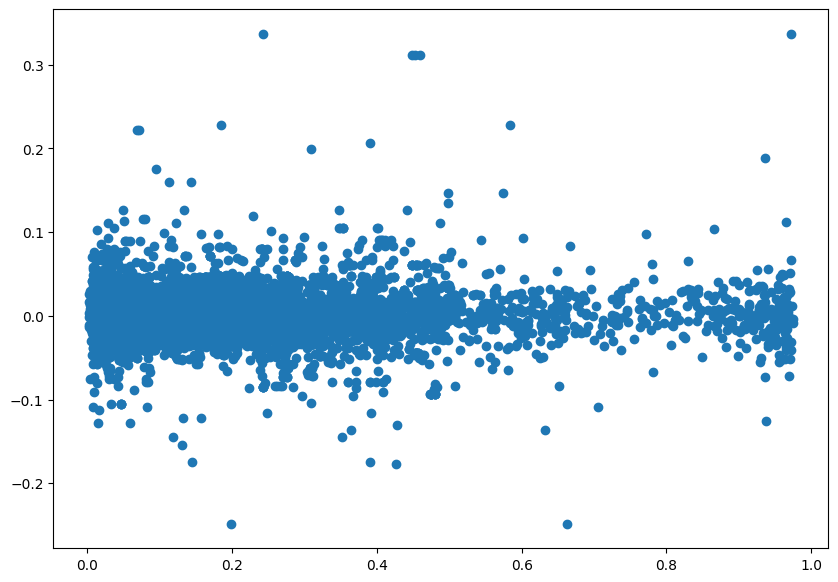

In [49]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize =(10, 7))
# Creating plot
plt.scatter(df_merged['Pos Ratio'],df_merged['Returns Next Day(no NaN)'])
# show plot
plt.show()

In [60]:
# save csv locally
df_merged.to_csv('/content/sample_data/sent_stock_data.csv', index=False)
#Copy CSV to GitHub Repository
!cp /content/sample_data/sent_stock_data.csv /content/CVX_Rice_project/04_Stock_Modeling/
#Commit and Push Changes
!git config --global user.email "bw58@rice.edu"
%cd /content/CVX_Rice_project/04_Stock_Modeling/
!git add sent_stock_data.csv
!git commit -m "Add sent_stock_data.csv"
!git push origin main

/content/CVX_Rice_project/04_Stock_Modeling
[main ccbbf5f] Add sent_stock_data.csv
 1 file changed, 6360 insertions(+), 6360 deletions(-)
Enumerating objects: 7, done.
Counting objects: 100% (7/7), done.
Delta compression using up to 2 threads
Compressing objects: 100% (4/4), done.
Writing objects: 100% (4/4), 340.62 KiB | 2.54 MiB/s, done.
Total 4 (delta 3), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (3/3), completed with 3 local objects.
To https://github.com/Kussil/CVX_Rice_project.git
   d070ce3..ccbbf5f  main -> main


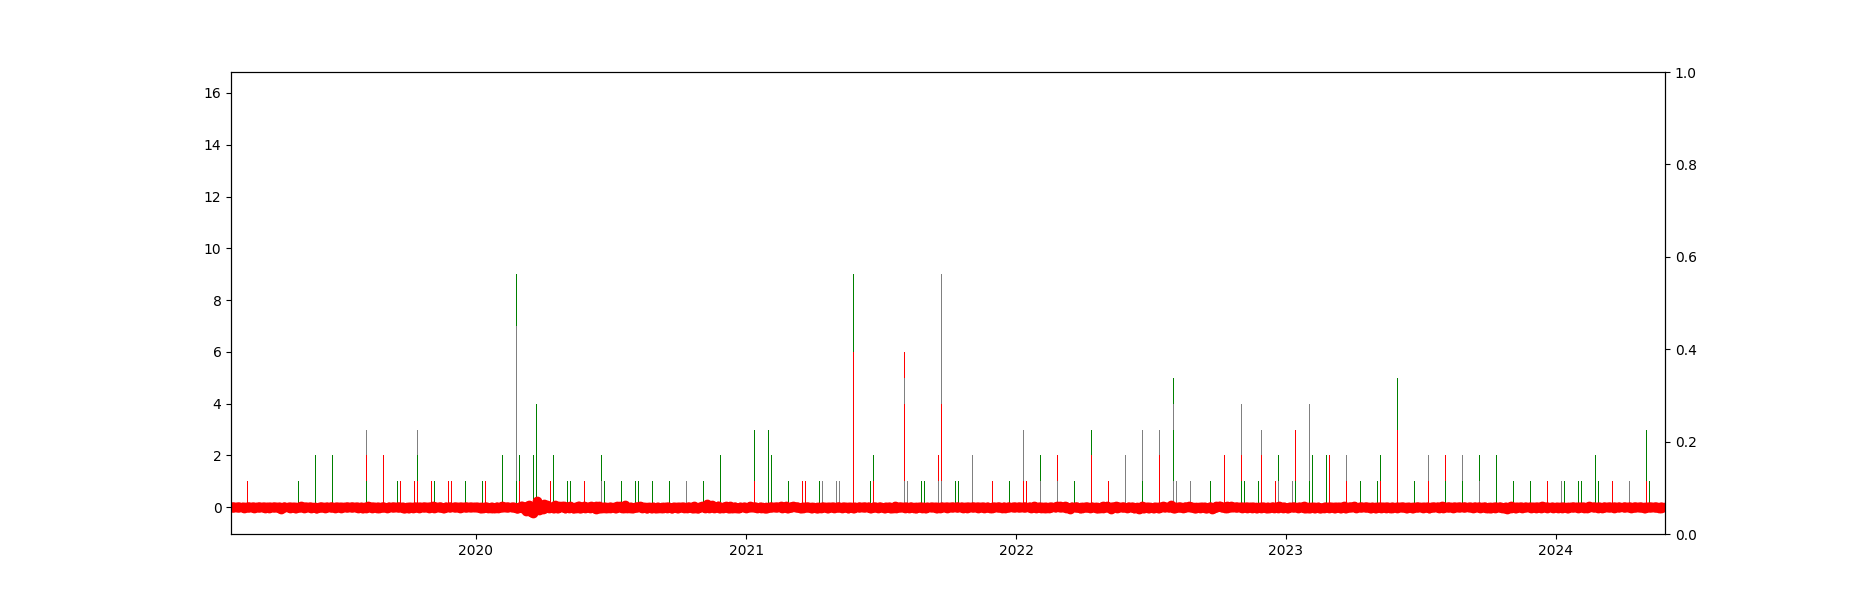

In [51]:
%matplotlib ipympl
import matplotlib
import matplotlib.pyplot as plt
from datetime import datetime
import pytz
import numpy as np
tz = pytz.timezone('America/New_York')

fig, ax1 = plt.subplots()
fig.set_size_inches(18.5, 6, forward=True)

tolerance = 2 # points

ax1.plot(ret.index, ret['CVX'], 'ro-', picker=tolerance)

#stacked bar
dates = df_merged['Date']
weights = {
    "Negative": df_merged['negative_count'].tolist(),
    "Neutral": df_merged['neutral_count'].tolist(),
    "Positive": df_merged['positive_count'].tolist()
}

colors = {
    "Negative": 'red',
    "Neutral": 'gray',
    "Positive": 'green'
}

ax2 = ax1.twinx()

width = 0.1
bottom = np.zeros(len(dates))

for sentiment, weight in weights.items():
  p = ax1.bar(dates, weight, width, label=sentiment, bottom=bottom, color=colors[sentiment])
  bottom += weight

ax1.set_xlim(left=ret.index.min(),right=ret.index.max())
ax2.set_xlim(left=ret.index.min(),right=ret.index.max())

def onclick(event):
    line = event.artist
    xdata, ydata = line.get_data()
    ind = event.ind
    datetime_obj  = xdata[ind][0].astype('datetime64[s]').astype(datetime)
    formatted_date = datetime_obj.strftime('%Y-%m-%d')
    print(formatted_date)
    #query = 'summarize the top news articles for chevron?'
    #top_results = 3
    #print(textwrap.fill(ask_vector_query(query, top_results, date=str(formatted_date), pinecone_index = "newsembedding3"), width=80))

#cid = fig.canvas.mpl_connect('button_press_event', onclick)
cid = fig.canvas.mpl_connect('pick_event', onclick)

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV

In [71]:
df_merged

,Ticker,Date,article_count,neutral_count,positive_count,negative_count,neutral_avg,positive_avg,negative_avg,acquisition_avg,earnings_avg,production_avg,exploration_avg,green_energy_avg,Returns,Returns (no NaN),Returns Next Day,Returns Next Day(no NaN),Pos Ratio
0,BP,2019-02-20,1,1,0,0,0.360758,0.294953,0.344289,0.736298,0.477425,0.391735,0.280525,0.172157,0.002359,0.002359,-0.003482,-0.003482,0.294953
1,BP,2019-05-06,1,0,1,0,0.037869,0.626881,0.335249,0.859434,0.463459,0.335508,0.271463,0.119363,-0.003482,-0.003482,-0.009591,-0.009591,0.626881
2,BP,2019-05-22,2,0,0,2,0.088732,0.208069,0.703199,0.552889,0.470427,0.331845,0.240019,0.196936,-0.009591,-0.009591,-0.023618,-0.023618,0.104035
3,BP,2019-05-23,1,0,0,1,0.181392,0.017759,0.800849,0.344293,0.288831,0.227911,0.163844,0.084772,-0.023618,-0.023618,-0.007555,-0.007555,0.017759
4,BP,2019-05-31,1,0,0,1,0.135504,0.025621,0.838875,0.278301,0.246081,0.218290,0.186850,0.134211,-0.007555,-0.007555,0.006179,0.006179,0.025621
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6354,XOM,2024-05-07,1,0,1,0,0.031351,0.580889,0.387760,0.603484,0.484704,0.368900,0.278519,0.201900,-0.004968,-0.004968,0.019716,0.019716,0.580889
6355,XOM,2024-05-09,1,0,0,1,0.188978,0.233985,0.577037,0.962017,0.903326,0.730688,0.596963,0.524199,0.019716,0.019716,-0.004053,-0.004053,0.233985
6356,XOM,2024-05-10,2,0,1,1,0.100749,0.556811,0.342440,0.728350,0.678213,0.469291,0.373627,0.283556,-0.004053,-0.004053,NaN,0.015017,0.278406
6357,XOM,2024-05-11,1,0,0,1,0.172089,0.253665,0.574246,0.840408,0.641442,0.495867,0.398473,0.247668,NaN,0.015017,0.015017,0.015017,0.253665


In [72]:
df_merged = df_merged.drop(['Returns','Returns Next Day', 'Returns Next Day(no NaN)'], axis=1)

In [73]:
df_merged

,Ticker,Date,article_count,neutral_count,positive_count,negative_count,neutral_avg,positive_avg,negative_avg,acquisition_avg,earnings_avg,production_avg,exploration_avg,green_energy_avg,Returns (no NaN),Pos Ratio
0,BP,2019-02-20,1,1,0,0,0.360758,0.294953,0.344289,0.736298,0.477425,0.391735,0.280525,0.172157,0.002359,0.294953
1,BP,2019-05-06,1,0,1,0,0.037869,0.626881,0.335249,0.859434,0.463459,0.335508,0.271463,0.119363,-0.003482,0.626881
2,BP,2019-05-22,2,0,0,2,0.088732,0.208069,0.703199,0.552889,0.470427,0.331845,0.240019,0.196936,-0.009591,0.104035
3,BP,2019-05-23,1,0,0,1,0.181392,0.017759,0.800849,0.344293,0.288831,0.227911,0.163844,0.084772,-0.023618,0.017759
4,BP,2019-05-31,1,0,0,1,0.135504,0.025621,0.838875,0.278301,0.246081,0.218290,0.186850,0.134211,-0.007555,0.025621
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6354,XOM,2024-05-07,1,0,1,0,0.031351,0.580889,0.387760,0.603484,0.484704,0.368900,0.278519,0.201900,-0.004968,0.580889
6355,XOM,2024-05-09,1,0,0,1,0.188978,0.233985,0.577037,0.962017,0.903326,0.730688,0.596963,0.524199,0.019716,0.233985
6356,XOM,2024-05-10,2,0,1,1,0.100749,0.556811,0.342440,0.728350,0.678213,0.469291,0.373627,0.283556,-0.004053,0.278406
6357,XOM,2024-05-11,1,0,0,1,0.172089,0.253665,0.574246,0.840408,0.641442,0.495867,0.398473,0.247668,0.015017,0.253665


In [74]:
df_dropna = df_merged.dropna()

In [87]:
X = df_dropna.drop(columns=['Date','Ticker','Returns (no NaN)'])
X

,article_count,neutral_count,positive_count,negative_count,neutral_avg,positive_avg,negative_avg,acquisition_avg,earnings_avg,production_avg,exploration_avg,green_energy_avg,Pos Ratio
0,1,1,0,0,0.360758,0.294953,0.344289,0.736298,0.477425,0.391735,0.280525,0.172157,0.294953
1,1,0,1,0,0.037869,0.626881,0.335249,0.859434,0.463459,0.335508,0.271463,0.119363,0.626881
2,2,0,0,2,0.088732,0.208069,0.703199,0.552889,0.470427,0.331845,0.240019,0.196936,0.104035
3,1,0,0,1,0.181392,0.017759,0.800849,0.344293,0.288831,0.227911,0.163844,0.084772,0.017759
4,1,0,0,1,0.135504,0.025621,0.838875,0.278301,0.246081,0.218290,0.186850,0.134211,0.025621
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6354,1,0,1,0,0.031351,0.580889,0.387760,0.603484,0.484704,0.368900,0.278519,0.201900,0.580889
6355,1,0,0,1,0.188978,0.233985,0.577037,0.962017,0.903326,0.730688,0.596963,0.524199,0.233985
6356,2,0,1,1,0.100749,0.556811,0.342440,0.728350,0.678213,0.469291,0.373627,0.283556,0.278406
6357,1,0,0,1,0.172089,0.253665,0.574246,0.840408,0.641442,0.495867,0.398473,0.247668,0.253665


In [88]:
y = df_dropna['Returns (no NaN)'].apply(lambda x: 1 if x > 0.0 else 0)
y
#explore ups vs done

0       1
1       0
2       0
3       0
4       0
       ..
6354    0
6355    1
6356    0
6357    1
6358    1
Name: Returns (no NaN), Length: 6355, dtype: int64

In [89]:
print(len(y))
print(y.sum())

6355
3220


Fitting 5 folds for each of 648 candidates, totalling 3240 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


{'bootstrap': True, 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
Accuracy: 0.6451612903225806
Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.65      0.64       620
           1       0.66      0.64      0.65       651

    accuracy                           0.65      1271
   macro avg       0.65      0.65      0.65      1271
weighted avg       0.65      0.65      0.65      1271

Index(['article_count', 'neutral_count', 'positive_count', 'negative_count',
       'neutral_avg', 'positive_avg', 'negative_avg', 'acquisition_avg',
       'earnings_avg', 'production_avg', 'exploration_avg', 'green_energy_avg',
       'Pos Ratio'],
      dtype='object')
[0.01050323 0.00591012 0.00712921 0.01065392 0.10848302 0.1055041
 0.11111931 0.1106237  0.11088531 0.10362182 0.1053085  0.10415257
 0.10610519]


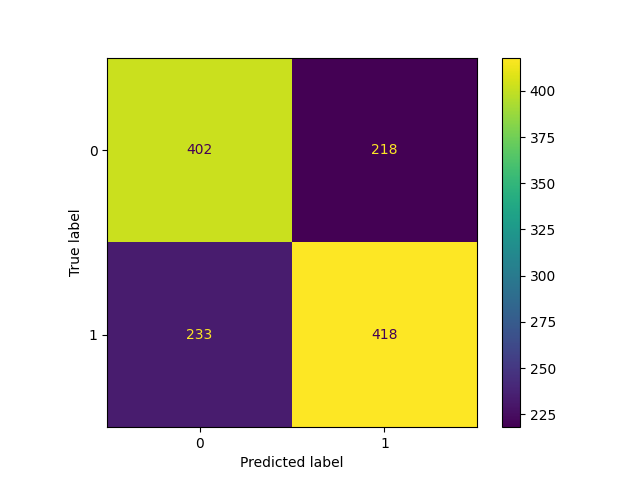

In [91]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid
#param_grid = {
#    'n_estimators': [100, 200, 300],
#    'max_depth': [None, 10, 20, 30],
#    'min_samples_split': [2, 5, 10],
#    'min_samples_leaf': [1, 2, 4],
#    'max_features': ['auto', 'sqrt', 'log2'],
#    'bootstrap': [True, False]
#}
param_grid = {
    'n_estimators': [300],
    'max_depth': [None],
    'min_samples_split': [5],
    'min_samples_leaf': [1],
    'max_features': ['auto'],
    'bootstrap': [True]
}

# Create a Random Forest classifier
rf_clf = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_clf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Train the classifier on the training set
grid_search.fit(X_train, y_train)

# Output the best parameters
print(grid_search.best_params_)

# Use the best estimator for predictions
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))
print(X.columns)
print(best_model.feature_importances_)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
{'colsample_bytree': 0.8, 'gamma': 0.1, 'learning_rate': 0.2, 'max_depth': 6, 'n_estimators': 100, 'reg_alpha': 0, 'reg_lambda': 2, 'subsample': 0.8}
Accuracy: 0.6191974822974036
Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.65      0.62       620
           1       0.64      0.59      0.61       651

    accuracy                           0.62      1271
   macro avg       0.62      0.62      0.62      1271
weighted avg       0.62      0.62      0.62      1271

Index(['article_count', 'neutral_count', 'positive_count', 'negative_count',
       'neutral_avg', 'positive_avg', 'negative_avg', 'acquisition_avg',
       'earnings_avg', 'production_avg', 'exploration_avg', 'green_energy_avg',
       'Pos Ratio'],
      dtype='object')
[0.04877013 0.08460812 0.06164214 0.07743507 0.07922556 0.08401477
 0.07945177 0.08159351 0.08378807 0.07763322 0.07437006 0.07915561
 0.08

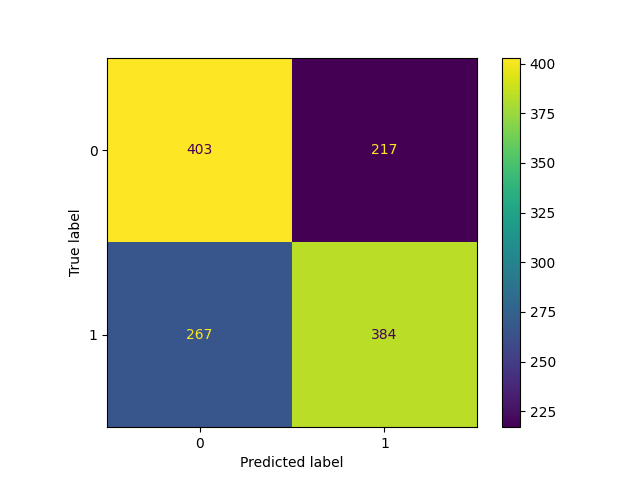

In [80]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
#param_grid = {
#    'n_estimators': [100, 200, 300],
#    'max_depth': [3, 6, 9],
#    'learning_rate': [0.01, 0.1, 0.2],
#    'subsample': [0.8, 1.0],
#    'colsample_bytree': [0.8, 1.0],
#    'gamma': [0, 0.1, 0.2],
#    'reg_alpha': [0, 0.1, 0.5],
#    'reg_lambda': [1, 1.5, 2]
#}

param_grid = {
    'colsample_bytree': [0.8],
    'gamma': [0.1],
    'learning_rate': [0.2],
    'max_depth': [6],
    'n_estimators': [100],
    'reg_alpha': [0],
    'reg_lambda': [2],
    'subsample': [0.8]
}

# Initialize the model
XGB = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=XGB, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the GridSearchCV to find the best parameters (assuming you have training data `X_train` and `y_train`)
grid_search.fit(X_train, y_train)

# Output the best parameters
print(grid_search.best_params_)

# Use the best estimator for predictions
best_model_XGB = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model_XGB.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))
print(X.columns)
print(best_model_XGB.feature_importances_)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(best_model_XGB, X_test, y_test)

Accuracy: 0.5971675845790716
Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.63      0.60       620
           1       0.62      0.57      0.59       651

    accuracy                           0.60      1271
   macro avg       0.60      0.60      0.60      1271
weighted avg       0.60      0.60      0.60      1271



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


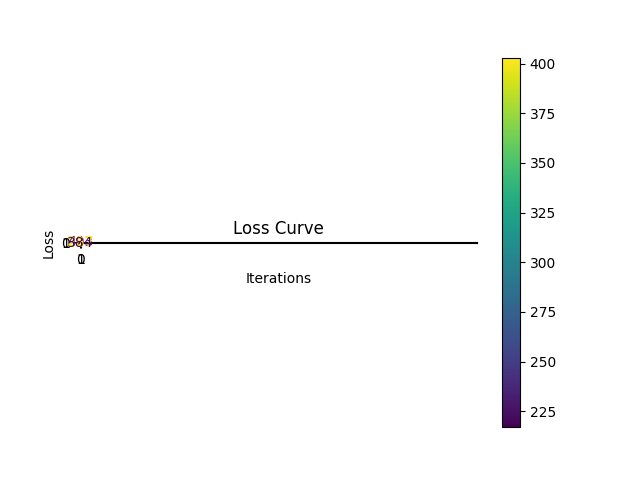

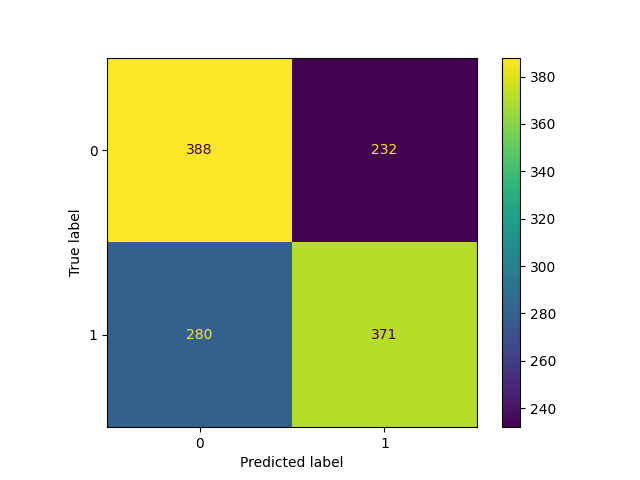

In [81]:
# Create an MLP classifier
mlp = MLPClassifier(
    hidden_layer_sizes=(100,100),
    max_iter=1000,
    solver='adam',
    random_state=42,
    learning_rate='constant',
    learning_rate_init=0.001,
    early_stopping=False,
    tol = 1e-8,
    n_iter_no_change = 100)


# Train the model
mlp.fit(X_train, y_train)

# Predict on test data
y_pred = mlp.predict(X_test)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plot the loss curve
plt.plot(mlp.loss_curve_)
plt.title("Loss Curve")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.show()


ConfusionMatrixDisplay.from_estimator(mlp, X_test, y_test)

Train Accuracy: 0.5088512981904013
Test Accuracy: 0.5051140833988985


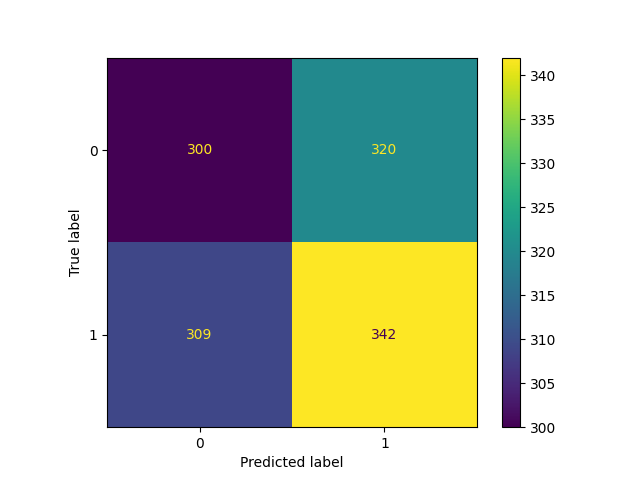

In [82]:
from sklearn.svm import SVC
import numpy as np
# Initialize lists to store training sizes and corresponding accuracies
training_sizes = np.linspace(0.1, 1.0, 10)
train_accuracies = []
test_accuracies = []

# Loop over different training set sizes
svm = SVC(kernel='sigmoid', random_state=42)
svm.fit(X_train, y_train)

# Predict on the training and test data
y_train_pred = svm.predict(X_train)
y_test_pred = svm.predict(X_test)

# Calculate accuracy for the training and test data
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print('Train Accuracy:',train_accuracy)
print('Test Accuracy:',test_accuracy)

ConfusionMatrixDisplay.from_estimator(svm, X_test, y_test)

In [ ]:
params = rf_clf.get_params()
print(params)

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}
